# SVM Guided Example and Challenge
Raj Prasad
June 2019

This is an assignment for my thinkful data science course.  The goal is to improve on a support vector machine (SVM) model.  

[html version of this notebook](https://daddyprasad5.github.io/svm_guided_example.html) - with all the code hidden away for a quick read

[jupyter notebook version](https://github.com/daddyprasad5/thinkful/blob/master/svm_guided_example.ipynb) - with all the code exposed in an interactive notebook

In [53]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

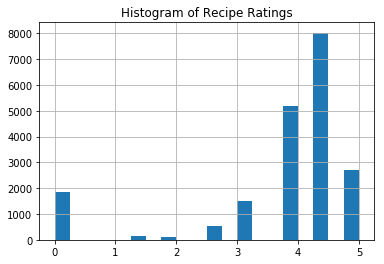

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [9]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
#svr.fit(X,Y)



__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

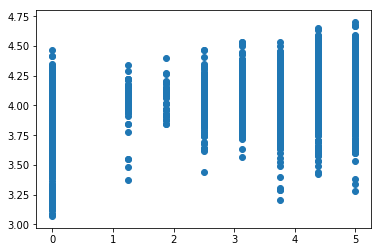

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

-0.003978314483867873

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

<class 'list'>
random guesser will be right 53.72340425531915% of the time


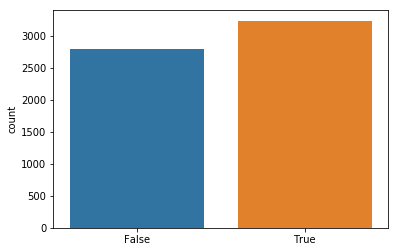

In [84]:
#transfrom the Y-values into categories, view the distribution
Ybi = [y >= 4 for y in Y]
print(type(Ybi))
sns.countplot(Ybi)
random_guess_accuracy = sum(Ybi) / len(Ybi) * 100
print("random guesser will be right {}% of the time".format(random_guess_accuracy))


In [90]:
#find the 30 most correlated with our target variable
from scipy.stats import pearsonr
from sklearn.metrics import matthews_corrcoef


x_col = []
corr = []
for colx in X:
    x_col.append(colx)
    #corr.append(abs(pearsonr(X[colx], Ybi)[0]))
    corr.append(abs(matthews_corrcoef(X[colx], Ybi)))
best_corrs = pd.DataFrame({"x_col": x_col, "corr": corr}).sort_values(by="corr", ascending=False)
display(best_corrs.head())
best_corrs = best_corrs.loc[:, "x_col"].head(30).values
    
best_corrs

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,x_col,corr
277,house & garden,0.108939
57,bon appétit,0.105428
186,drink,0.089732
179,dinner,0.081033
235,gin,0.079602


array(['house & garden', 'bon appétit', 'drink', 'dinner', 'gin',
       'alcoholic', 'roast', 'cheese', 'cocktail party', 'low fat',
       'grill', 'tree nut free', 'bitters', 'cornmeal', 'peanut free',
       'spirit', 'thanksgiving', 'soy free', 'christmas', 'harpercollins',
       'liqueur', 'rum', 'grill/barbecue', 'cocktail', 'christmas eve',
       'pork', 'tofu', 'pepper', 'backyard bbq', 'sausage'], dtype=object)

In [91]:
#build a model and evaluate performance
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import time

Xbest = X.loc[:, best_corrs]
X_train, X_test, y_train, y_test = train_test_split(Xbest, Ybi, test_size = 0.2, random_state = 465)

start_time = time.time()
svc = SVC()
svc = svc.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))


def predict_and_evaluate(models, model_names, X_train, y_train, X_test):
    
    i = 0
    best_alpha = []
    r_squared_train = []
    r_squared_test = []
    mean_abs_err = []
    mean_sq_err = []
    rt_mean_sq_err = []
    mean_abs_perc_err = []
        
    for model in models: 
        y_preds_train = model.predict(X_train)
        y_preds_test = model.predict(X_test)
        
        if (getattr(model, "alpha_", False)):
            best_alpha.append(model.alpha_)
        else: 
            best_alpha.append(None)
        r_squared_train.append(model.score(X_train, y_train))
        r_squared_test.append(model.score(X_test, y_test))
        #mean_abs_err.append(mean_absolute_error(y_test, y_preds_test))
        #mean_sq_err.append(mse(y_test, y_preds_test))
        #rt_mean_sq_err.append(rmse(y_test, y_preds_test))
        #mean_abs_perc_err.append(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100)
        i += 1
    summary = pd.DataFrame({"best_alpha": best_alpha, "r_squared_train": r_squared_train, 
                        "r_squared_test": r_squared_test})
    summary.index = model_names
    return summary
        
summ_results = predict_and_evaluate([svc, rfc],["svc", "rfc"], X_train, y_train, X_test)
summ_results




/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


--- 1.7512929439544678 seconds ---
--- 0.05768299102783203 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,best_alpha,r_squared_train,r_squared_test
svc,None,0.596426,0.578073
rfc,None,0.646093,0.585548


I've found the best (most correlated using phi coefficient and pearson's correlation) 30 variables and get a marginally better result tha pure random guessing.   Using 200 predictors makes little difference. I also included a random forest classifer to compare - and it does fractionally better.  Not sure how one might improve the performance further. 

In [87]:
X.head()

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

There's a selection bias in the sense that it's limited to one magazine's readers who may not representative of all recipe users. 
There's a selection bias in that those who give reviews may not be representative of all recipe users. 
